In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt 
import pandas as pd 


In [2]:
training_dataset = pd.read_csv("train.csv")

In [3]:
#The Ticket colum is not necessary and doesn't give anything useful information so 
#dropping it
training_dataset.drop("Ticket",axis=1,inplace=True)
training_dataset.drop("PassengerId",axis=1,inplace=True)
test_dataset.drop("Ticket",axis=1,inplace=True)

In [4]:
#creating new columns like family size = SibSp+Parch
training_dataset["Family_size"] = training_dataset["SibSp"] + training_dataset["Parch"]
training_dataset["Fare_per_person"] = training_dataset['Fare'] / (training_dataset['Family_size']+1)

In [5]:
training_dataset["Embarked"].value_counts()
#most of the people get up from Southhampton so replacing all 
#Nan values in dataset of Embarked with S
training_dataset["Embarked"] = training_dataset["Embarked"].fillna('S')

In [6]:
def bar_chart(feature):
    survived = training_dataset[training_dataset['Survived']==1][feature].value_counts()
    not_survived = training_dataset[training_dataset['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,not_survived])
    df.index=['Survived','Not_survived']
    df.plot(kind='bar',fig=(18,6),title=feature)

In [7]:
training_dataset["Cabin"].isna().sum()      #687
#There is 687 null values in the cabin and it won't give any useful information
#so decided to exclude this 
training_dataset.drop("Cabin",axis=1,inplace=True)

In [8]:
#Let's group people based on their class and their sex
class_sex_group = training_dataset.groupby(['Pclass','Sex'])


In [9]:
temp = training_dataset.groupby(["Sex"])
temp["Age"].median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [10]:
#I decided to replace Nan Age value with the median age of
#each group of Pclass and Sex 

median = class_sex_group["Age"].median()
print(median)

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64


In [11]:
#This is kind of overwhelming, I should have done using a loop or something like that
#but I cannot think of any way beside this
#improvement needed in this section
condtion1 = (training_dataset.Age.isna()) & (training_dataset.Pclass == 1) & (training_dataset.Sex == "female")
condtion2 = (training_dataset.Age.isna()) & (training_dataset.Pclass == 1) & (training_dataset.Sex == "male")
condtion3 = (training_dataset.Age.isna()) & (training_dataset.Pclass == 2) & (training_dataset.Sex == "female")
condtion4 = (training_dataset.Age.isna()) & (training_dataset.Pclass == 2) & (training_dataset.Sex == "male")

condtion5 = (training_dataset.Age.isna()) & (training_dataset.Pclass == 3) & (training_dataset.Sex == "female")
condtion6 = (training_dataset.Age.isna()) & (training_dataset.Pclass == 3) & (training_dataset.Sex == "male")



In [12]:
training_dataset.loc[condtion1,"Age"] = median[1][0]
training_dataset.loc[condtion2,"Age"] = median[1][1]
training_dataset.loc[condtion3,"Age"] = median[2][0]
training_dataset.loc[condtion4,"Age"] =median[2][1]
training_dataset.loc[condtion5,"Age"] = median[3][0]
training_dataset.loc[condtion6,"Age"] = median[3][1]

In [13]:
#All The Nan values have been replaced and there is no Nan Values
training_dataset.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size,Fare_per_person
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,3.62500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,35.64165
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,7.92500
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,26.55000
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,8.05000
5,0,3,"Moran, Mr. James",male,25.0,0,0,8.4583,Q,0,8.45830
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,0,51.86250
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,4,4.21500
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,2,3.71110
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,1,15.03540


In [14]:
corr_matrix = training_dataset.corr()
corr_matrix["Survived"].sort_values(ascending = False)

Survived           1.000000
Fare               0.257307
Fare_per_person    0.221600
Parch              0.081629
Family_size        0.016639
SibSp             -0.035322
Age               -0.059579
Pclass            -0.338481
Name: Survived, dtype: float64

In [15]:
training_dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size,Fare_per_person
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,3.62500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,35.64165
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,7.92500
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,26.55000
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,8.05000


In [16]:
#drop name category for now
training_dataset.drop("Name",axis=1,inplace=True)


In [17]:
labels = training_dataset["Survived"].copy()

In [18]:
training_dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size,Fare_per_person
0,0,3,male,22.0,1,0,7.2500,S,1,3.62500
1,1,1,female,38.0,1,0,71.2833,C,1,35.64165
2,1,3,female,26.0,0,0,7.9250,S,0,7.92500
3,1,1,female,35.0,1,0,53.1000,S,1,26.55000
4,0,3,male,35.0,0,0,8.0500,S,0,8.05000


In [19]:
from sklearn.model_selection import train_test_split
training_dataset.drop("Survived",axis=1,inplace=True)

X_train,X_test,y_train,y_test = train_test_split(training_dataset,labels,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)


(712, 9) (179, 9) (712,) (179,)


In [20]:
#create a pipeline 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

training_dataset_num = training_dataset.drop(["Sex","Embarked"],axis=1)
num_attribute = list(training_dataset_num)
name_attri = ["Sex","Embarked"]




In [21]:
num_attribute

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_size', 'Fare_per_person']

In [22]:
full_pipeline = ColumnTransformer([
    ("std_scaler",StandardScaler(),num_attribute),
    ("cat",OneHotEncoder(),name_attri)
])

In [23]:
#training_prepared = full dataset
#X_train = partial training dataset with 712*9
#Y_train = partial labels of training dataset 712
#X_test = partial validation dataset 179*9
#y_test = partia validation label dataset
training_prepared = full_pipeline.fit_transform(training_dataset)
Xtrain_prepared = full_pipeline.fit_transform(X_train)
Xtest_prepared = full_pipeline.fit_transform(X_test)


In [24]:
#checking decision Tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix


-----The accuracy of Decision Tree model----- 
The accurcay of the Decision Tree Classifier is: 75.98
The cross validatedaccuray of the Decision Tree Classifire is: 79.47


Text(0.5, 1.05, 'Confusion  Matrix')

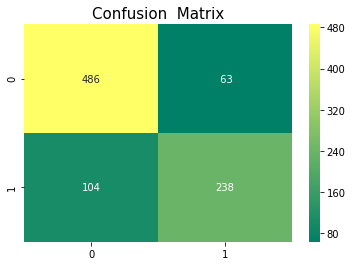

In [25]:

#Using decision Tree Classifier:
dtc = DecisionTreeClassifier(criterion='gini', 
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto')
dtc.fit(Xtrain_prepared,y_train)
print("-----The accuracy of Decision Tree model----- ")
predictions = dtc.predict(Xtest_prepared)
print("The accurcay of the Decision Tree Classifier is:",round(accuracy_score(predictions,y_test)*100,2))
result_decisionTree = cross_val_score(dtc,training_prepared,labels,scoring='accuracy',cv=10)
print("The cross validatedaccuray of the Decision Tree Classifire is:", round(result_decisionTree.mean()*100,2))
pred = cross_val_predict(dtc,training_prepared,labels,cv=10)
sns.heatmap(confusion_matrix(labels,pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion  Matrix',y=1.05,size=15)

-----The accuracy of Random Forest  model----- 
The accuracy:  77.65
The cross validated score is: 82.39


Text(0.5, 1.05, 'Confusion  Matrix')

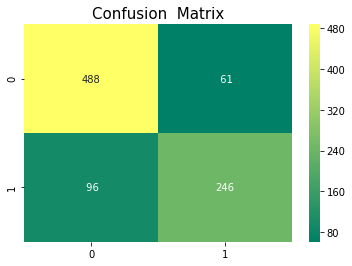

In [26]:
#Random Forest Classifier
from sklearn.metrics import accuracy_score
rfc_model = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
rfc_model.fit(Xtrain_prepared,y_train)
prediction_tree = rfc_model.predict(Xtest_prepared)
print("-----The accuracy of Random Forest  model----- ")
print("The accuracy: ",round(accuracy_score(prediction_tree,y_test)*100,2))
rfc_score = cross_val_score(rfc_model,training_prepared,labels,scoring="accuracy",cv=10)
print("The cross validated score is:", round(rfc_score.mean()*100,2))
pred = cross_val_predict(rfc_model,training_prepared,labels,cv=10)
sns.heatmap(confusion_matrix(labels,pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion  Matrix',y=1.05,size=15)




-----The accuracy of SVC model----- 
The accuracy of the SVC model is: 80.45
The cross vaidated score pf SVC model is: 81.82


Text(0.5, 1.05, 'Confusion  Matrix')

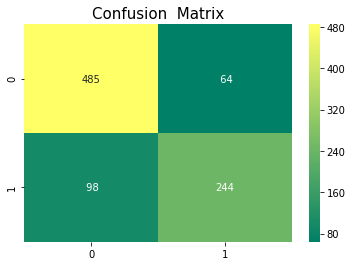

In [27]:
from sklearn.svm import SVC
model_svc = SVC(kernel="rbf")
model_svc.fit(Xtrain_prepared,y_train)
prediction_svc = model_svc.predict(Xtest_prepared)
print("-----The accuracy of SVC model----- ")
print("The accuracy of the SVC model is:",round(accuracy_score(y_test,prediction_svc)*100,2))
svc_score = cross_val_score(model_svc,training_prepared,labels,scoring="accuracy",cv=10)
print("The cross vaidated score pf SVC model is:" ,round(svc_score.mean()*100,2))
pred = cross_val_predict(model_svc,training_prepared,labels,cv=10)
sns.heatmap(confusion_matrix(labels,pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion  Matrix',y=1.05,size=15)



--------------The Accuracy of the model----------------------------
The accuracy of the AdaBoostClassifier is 75.42
The cross validated score for AdaBoostClassifier is: 80.48


Text(0.5, 1.05, 'Confusion_matrix')

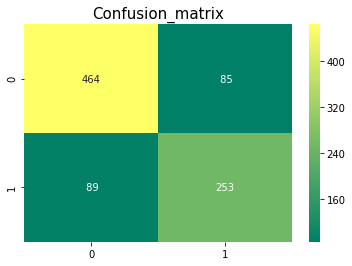

In [28]:
from sklearn.ensemble import AdaBoostClassifier
ada_model= AdaBoostClassifier()
ada_model.fit(Xtrain_prepared,y_train)
prediction_adb=ada_model.predict(Xtest_prepared)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the AdaBoostClassifier is',round(accuracy_score(y_test,prediction_adb)*100,2))
# kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_adb=cross_val_score(ada_model,training_prepared,labels,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoostClassifier is:',round(result_adb.mean()*100,2))
y_pred = cross_val_predict(ada_model,training_prepared,labels,cv=10)
sns.heatmap(confusion_matrix(labels,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

-----The accuracy of Logistic Regression model----- 
The accuracy:  81.01
The cross validated score for Logisitc Regression is: 80.36


Text(0.5, 1.05, 'Confusion_matrix')

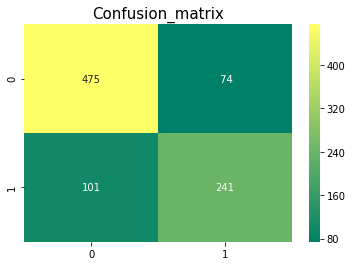

In [29]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(Xtrain_prepared,y_train)
print("-----The accuracy of Logistic Regression model----- ")
pred_log = log_model.predict(Xtest_prepared)
print("The accuracy: ", round(accuracy_score(pred_log,y_test)*100,2))

result_log=cross_val_score(log_model,training_prepared,labels,cv=10,scoring='accuracy')
print('The cross validated score for Logisitc Regression is:',round(result_log.mean()*100,2))
y_pred = cross_val_predict(log_model,training_prepared,labels,cv=10)
sns.heatmap(confusion_matrix(labels,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)


The accuracy of the KNeighbors Classifer is: 
Accuracy:  75.42
The cross validated score for AdaBoostClassifier is: 80.36


Text(0.5, 1.05, 'Confusion_matrix')

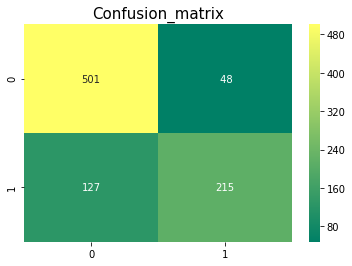

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(Xtrain_prepared,y_train)
knn_pred = knn_model.predict(Xtest_prepared)
print("The accuracy of the KNeighbors Classifer is: ")
print("Accuracy: ",round(accuracy_score(knn_pred,y_test)*100,2))

result_knn=cross_val_score(knn_model,training_prepared,labels,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoostClassifier is:',round(result_knn.mean()*100,2))
y_pred = cross_val_predict(knn_model,training_prepared,labels,cv=10)
sns.heatmap(confusion_matrix(labels,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [33]:
#The accuracy of all the model
columns = ["DTC","RFC","SVC","ADA","Log","KNN"]
data= [result_decisionTree.mean(),rfc_score.mean(),svc_score.mean(),result_adb.mean(),result_log.mean(),result_knn.mean()]

cross_validated_table = pd.DataFrame({'Model':columns,'score':data})

In [35]:
cross_validated_table.sort_values(by="score",ascending=False)

,Model,score
1,RFC,0.823870
2,SVC,0.818190
3,ADA,0.804782
4,Log,0.803608
5,KNN,0.803608
0,DTC,0.794707


In [39]:
#This shows that the RFC and SVC have a better score than others 
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=500,stop=1000,num=10)]
max_features = ['auto','sqrt']
max_depth =[int(x) for x in np.linspace(10,110,num=11)]
max_depth.append(None)
min_samples_split =[2,5,10,12]
min_samples_leaf = [1,2,4]
bootstrap=[True,False]

random_grid = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'bootstrap':bootstrap,
}

In [48]:
model_rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(model_rf,random_grid,n_iter=100,cv=5,verbose=2,random_state=42,n_jobs=-1)
rf_random.fit(training_prepared,labels)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10, 12],
                                        'n_estimators': [500, 555, 611, 666,
                                                         722, 777, 833, 888,
                                                         944, 1000]},
                   random_state=42, verbose=2)

In [49]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=110, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=500)

In [50]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': False}

In [51]:
rf_random.best_score_

0.8339150084740442

In [52]:
best_rfc = RandomForestClassifier(n_estimators=500,min_samples_split=10,min_samples_leaf=2,max_features='sqrt',max_depth=110,bootstrap=False)
best_rfc.fit(training_prepared,labels)
predictions = best_rfc.predict(training_prepared)
print("The accuracy: ",round(accuracy_score(predictions,labels)*100,2))

The accuracy:  91.69


In [53]:
# Let's check for SVC model as well
# Some of the important hyperparameter of SVC are:
# C, kernel, gammma

The accuracy:  83.8


In [54]:
model_SVC = SVC()
params ={
    'C':[0.1,1,10,70,100],
    'gamma':[1,0.1,0.01,0.001],
    'kernel':['rbf','poly','sigmoid']
}

sv_random = RandomizedSearchCV(model_SVC,params,cv=5,scoring="accuracy",n_jobs=4,verbose=1)
sv_random.fit(training_prepared,labels)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  1.6min finished


RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=4,
                   param_distributions={'C': [0.1, 1, 10, 70, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['rbf', 'poly', 'sigmoid']},
                   scoring='accuracy', verbose=1)

In [57]:
print(sv_random.best_estimator_,
sv_random.best_score_,
sv_random.best_params_)

SVC(C=100, gamma=0.1, kernel='poly') 0.8058627832527778 {'kernel': 'poly', 'gamma': 0.1, 'C': 100}


In [58]:
best_SVC_model = SVC(C=100,kernel='poly',gamma=0.1)
best_SVC_model.fit(training_prepared,labels)
pred = best_SVC_model.predict(Xtest_prepared)
print("The accuracy: ",round(accuracy_score(pred,y_test)*100,2))

The accuracy:  84.92


In [61]:
pred = best_SVC_model.predict(training_prepared)
print("The accuracy: ",round(accuracy_score(pred,labels)*100,2))

The accuracy:  86.53


In [65]:
#The column part of the SEX and EMbarked is misplaced

dt = pd.DataFrame(data=training_prepared,columns=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_size', 'Fare_per_person','M_sex','F_sex','Emb_C','Emb_Q','Emb_S'])

Important featues


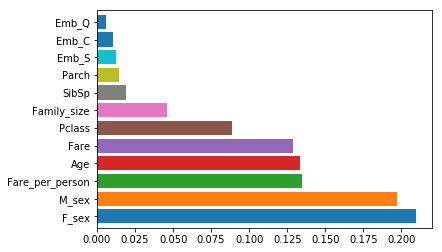

In [66]:
#The model for this dataset is Random Forest with the above parameters
print("Important featues")
pd.Series(best_rfc.feature_importances_,dt.columns).sort_values(ascending=False).plot.barh(width=0.8)

In [94]:
test_dataset = pd.read_csv("test.csv")


In [95]:
passengerId = test_dataset["PassengerId"].copy()
test_dataset.drop(['PassengerId','Name','Cabin'],axis=1,inplace=True)


In [96]:
condtion1 = (test_dataset.Age.isna()) & (test_dataset.Pclass == 1) & (test_dataset.Sex == "female")
condtion2 = (test_dataset.Age.isna()) & (test_dataset.Pclass == 1) & (test_dataset.Sex == "male")
condtion3 = (test_dataset.Age.isna()) & (test_dataset.Pclass == 2) & (test_dataset.Sex == "female")
condtion4 = (test_dataset.Age.isna()) & (test_dataset.Pclass == 2) & (test_dataset.Sex == "male")

condtion5 = (test_dataset.Age.isna()) & (test_dataset.Pclass == 3) & (test_dataset.Sex == "female")
condtion6 = (test_dataset.Age.isna()) & (test_dataset.Pclass == 3) & (test_dataset.Sex == "male")


In [97]:
test_dataset.loc[condtion1,"Age"] = median[1][0]
test_dataset.loc[condtion2,"Age"] = median[1][1]
test_dataset.loc[condtion3,"Age"] = median[2][0]
test_dataset.loc[condtion4,"Age"] =median[2][1]
test_dataset.loc[condtion5,"Age"] = median[3][0]
test_dataset.loc[condtion6,"Age"] = median[3][1]

In [99]:
test_dataset.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        1
Embarked    0
dtype: int64

In [108]:
test_dataset.fillna(test_dataset["Fare"].median(),inplace=True)

In [109]:
test_dataset.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [111]:
#creating new columns like family size = SibSp+Parch
test_dataset["Family_size"] = test_dataset["SibSp"] + test_dataset["Parch"]
test_dataset["Fare_per_person"] = test_dataset['Fare'] / (test_dataset['Family_size']+1)

In [112]:
test_dataset.head(10)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,Fare_per_person
0,3,male,34.5,0,0,330911,7.8292,Q,0,7.829200
1,3,female,47.0,1,0,363272,7.0000,S,1,3.500000
2,2,male,62.0,0,0,240276,9.6875,Q,0,9.687500
3,3,male,27.0,0,0,315154,8.6625,S,0,8.662500
4,3,female,22.0,1,1,3101298,12.2875,S,2,4.095833
5,3,male,14.0,0,0,7538,9.2250,S,0,9.225000
6,3,female,30.0,0,0,330972,7.6292,Q,0,7.629200
7,2,male,26.0,1,1,248738,29.0000,S,2,9.666667
8,3,female,18.0,0,0,2657,7.2292,C,0,7.229200
9,3,male,21.0,2,0,A/4 48871,24.1500,S,2,8.050000


In [113]:
test_prepared = full_pipeline.fit_transform(test_dataset)

In [115]:
final_preds = best_rfc.predict(test_prepared)

In [116]:
submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": final_preds
})

In [120]:
submission.to_csv("Submission.csv",index=False)